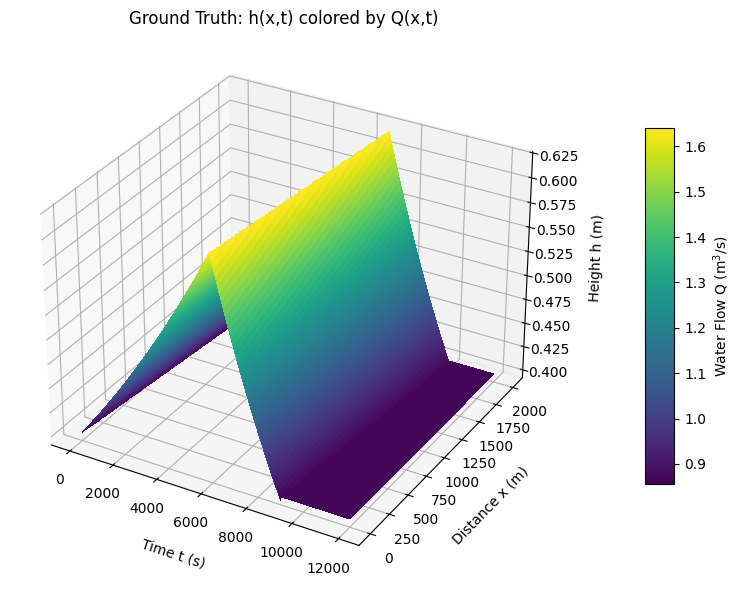


=== Train A (Stabilized: MAP + Tuned Weights) ===
[ArchA_FIXED] Adam    1 loss=2.969e+02 mse_u=1.269e+00 mse_p=4.469e-03 prior=2.842e+02 S0=1.002e-02 n=4.287e-02
[ArchA_FIXED] Adam  200 loss=2.462e+02 mse_u=4.379e-04 mse_p=4.970e-05 prior=2.462e+02 S0=9.520e-03 n=4.101e-02
[ArchA_FIXED] Adam  400 loss=2.110e+02 mse_u=1.012e-04 mse_p=1.544e-05 prior=2.110e+02 S0=9.022e-03 n=3.916e-02
[ArchA_FIXED] Adam  600 loss=1.788e+02 mse_u=9.088e-05 mse_p=2.506e-06 prior=1.788e+02 S0=8.529e-03 n=3.735e-02
[ArchA_FIXED] Adam  800 loss=1.498e+02 mse_u=8.335e-05 mse_p=1.554e-06 prior=1.498e+02 S0=8.043e-03 n=3.557e-02
[ArchA_FIXED] Adam 1000 loss=1.239e+02 mse_u=7.734e-05 mse_p=8.044e-06 prior=1.239e+02 S0=7.566e-03 n=3.384e-02
[ArchA_FIXED] Adam 1200 loss=1.011e+02 mse_u=7.206e-05 mse_p=1.832e-05 prior=1.011e+02 S0=7.100e-03 n=3.217e-02
[ArchA_FIXED] Adam 1400 loss=8.120e+01 mse_u=6.830e-05 mse_p=2.966e-05 prior=8.120e+01 S0=6.647e-03 n=3.057e-02
[ArchA_FIXED] Adam 1600 loss=6.409e+01 mse_u=6.544e-0

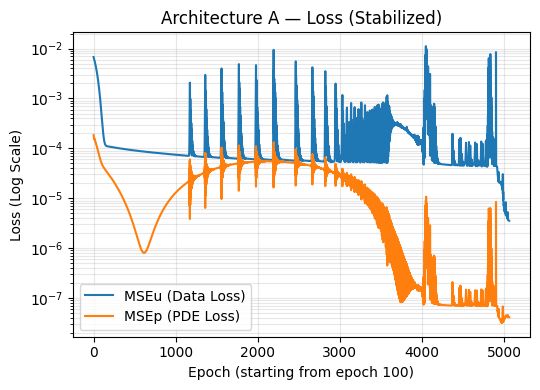

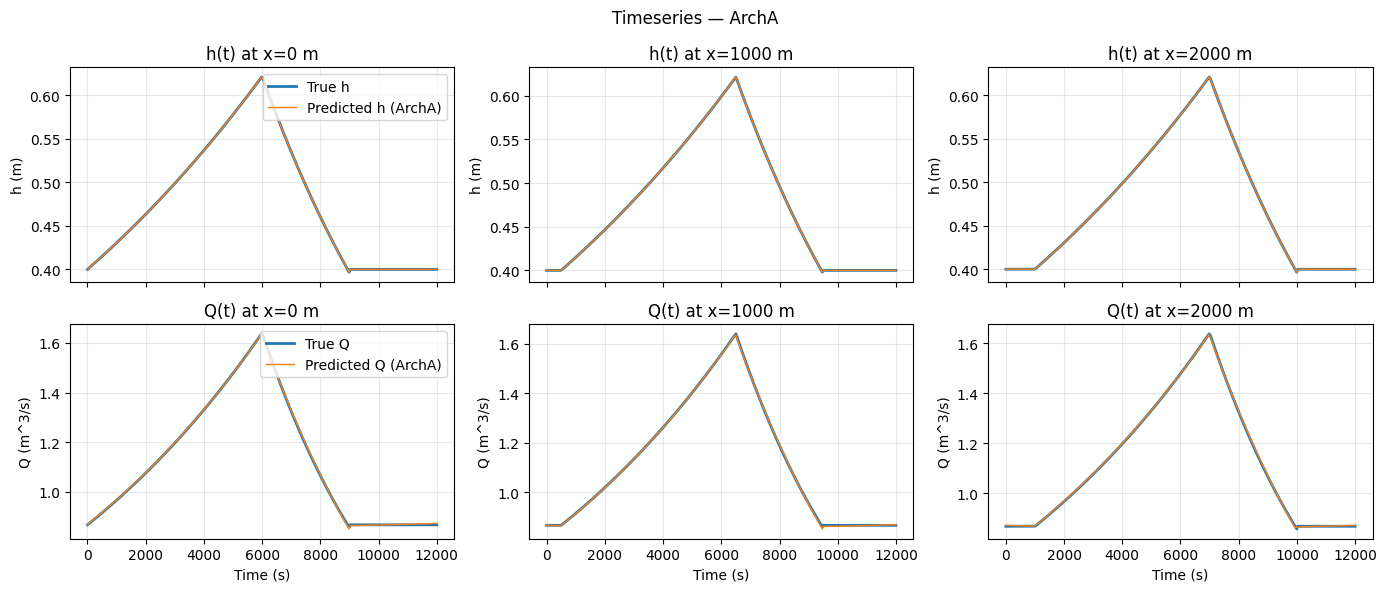

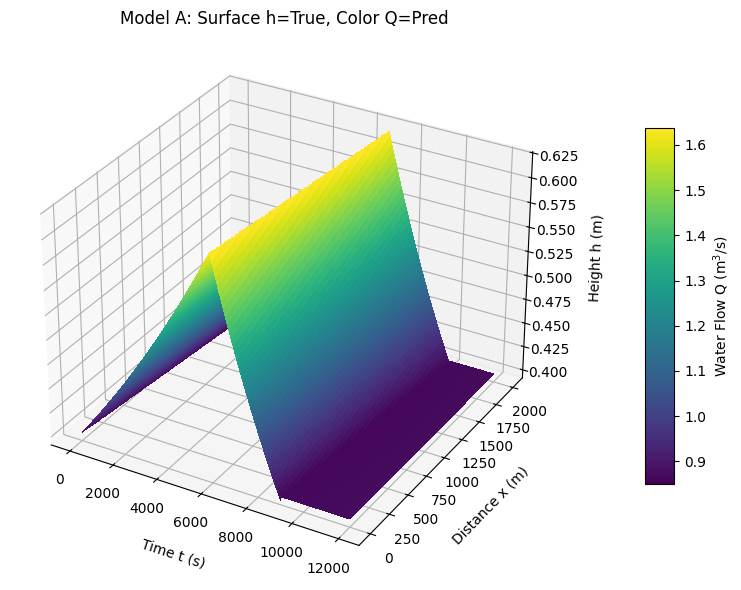


=== Train B (learn S0,n; bounded) ===
[ArchB] Adam    1 loss=1.460e+00 mse_u=1.442e+00 mse_p=1.848e-02 S0=1.001e-02 n=4.344e-02
[ArchB] Adam  200 loss=9.822e-03 mse_u=9.640e-03 mse_p=1.818e-04 S0=1.025e-02 n=4.255e-02
[ArchB] Adam  400 loss=4.392e-03 mse_u=4.251e-03 mse_p=1.412e-04 S0=1.049e-02 n=4.198e-02
[ArchB] Adam  600 loss=5.766e-04 mse_u=5.421e-04 mse_p=3.456e-05 S0=1.063e-02 n=4.156e-02
[ArchB] Adam  800 loss=3.805e-04 mse_u=3.677e-04 mse_p=1.283e-05 S0=1.069e-02 n=4.141e-02
[ArchB] Adam 1000 loss=1.845e-04 mse_u=1.808e-04 mse_p=3.618e-06 S0=1.069e-02 n=4.137e-02
[ArchB] Adam 1200 loss=1.657e-04 mse_u=1.629e-04 mse_p=2.789e-06 S0=1.069e-02 n=4.136e-02
[ArchB] Adam 1400 loss=1.619e-04 mse_u=1.593e-04 mse_p=2.571e-06 S0=1.068e-02 n=4.135e-02
[ArchB] Adam 1600 loss=2.114e-03 mse_u=2.039e-03 mse_p=7.465e-05 S0=1.068e-02 n=4.134e-02
[ArchB] Adam 1800 loss=9.254e-04 mse_u=9.021e-04 mse_p=2.333e-05 S0=1.067e-02 n=4.119e-02
[ArchB] Adam 2000 loss=1.567e-04 mse_u=1.543e-04 mse_p=2.432e

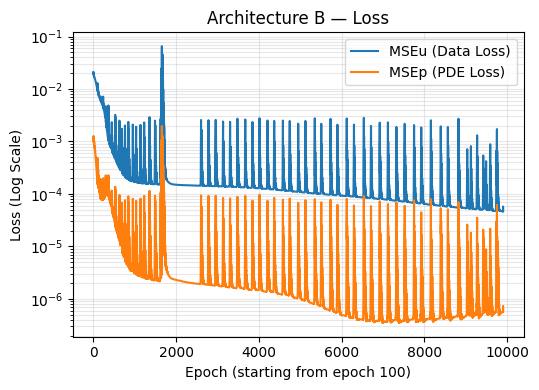

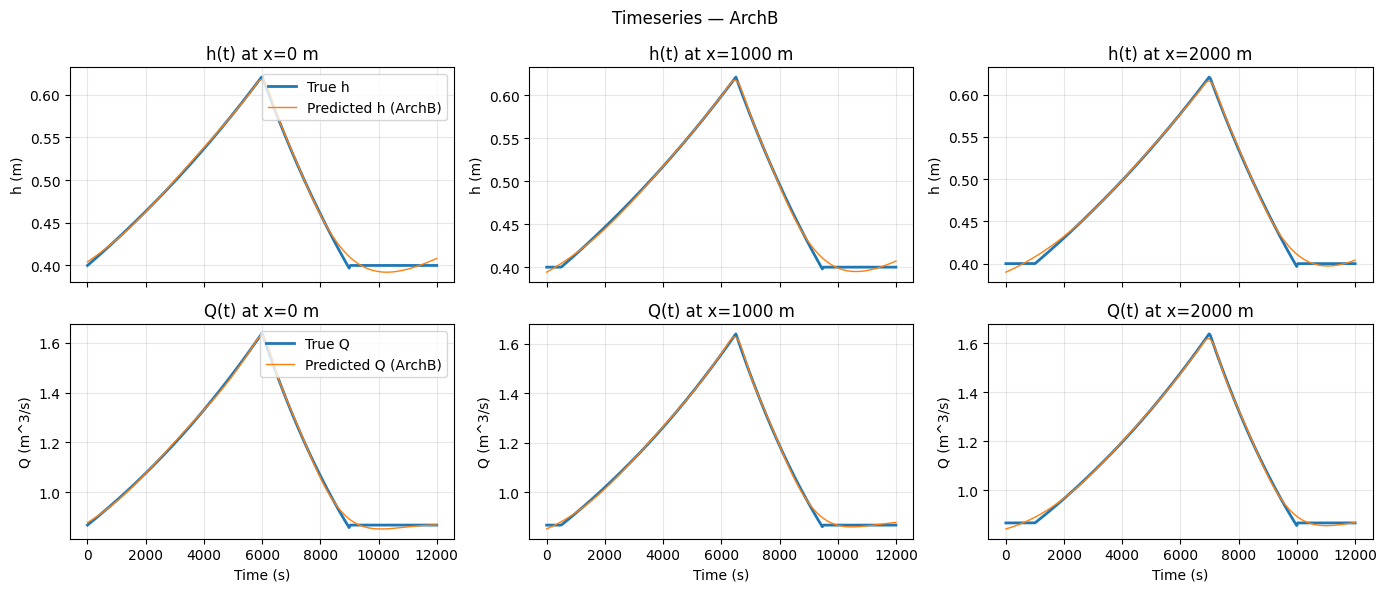

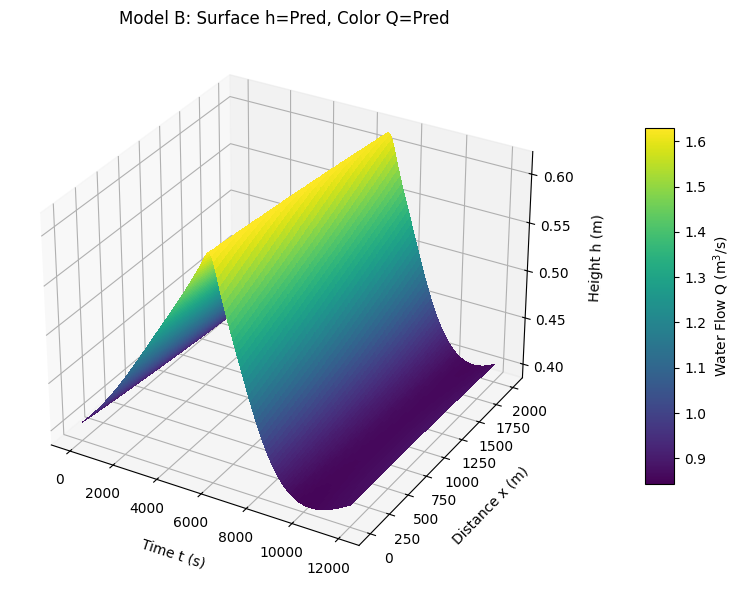


=== Train C (learn S0,n; MAP + dht penalty) ===
[ArchC] Adam    1 loss=3.258e+02 mse_u=1.709e+00 mse_p=1.286e-02 prior=3.241e+02 dpen=2.425e-09 S0=1.001e-02 n=4.306e-02
[ArchC] Adam  200 loss=2.842e+02 mse_u=2.415e-02 mse_p=9.969e-04 prior=2.842e+02 dpen=2.393e-09 S0=9.518e-03 n=4.123e-02
[ArchC] Adam  400 loss=2.470e+02 mse_u=7.725e-03 mse_p=1.098e-04 prior=2.470e+02 dpen=1.279e-09 S0=9.021e-03 n=3.947e-02
[ArchC] Adam  600 loss=2.130e+02 mse_u=4.865e-03 mse_p=3.129e-05 prior=2.130e+02 dpen=1.155e-09 S0=8.529e-03 n=3.783e-02
[ArchC] Adam  800 loss=1.820e+02 mse_u=1.171e-03 mse_p=3.811e-05 prior=1.820e+02 dpen=6.814e-10 S0=8.044e-03 n=3.630e-02
[ArchC] Adam 1000 loss=1.541e+02 mse_u=7.144e-04 mse_p=2.011e-05 prior=1.541e+02 dpen=4.317e-10 S0=7.568e-03 n=3.490e-02
[ArchC] Adam 1200 loss=1.292e+02 mse_u=3.358e-04 mse_p=7.182e-06 prior=1.292e+02 dpen=3.497e-10 S0=7.104e-03 n=3.366e-02
[ArchC] Adam 1400 loss=1.072e+02 mse_u=2.110e-04 mse_p=3.658e-06 prior=1.072e+02 dpen=3.209e-10 S0=6.653

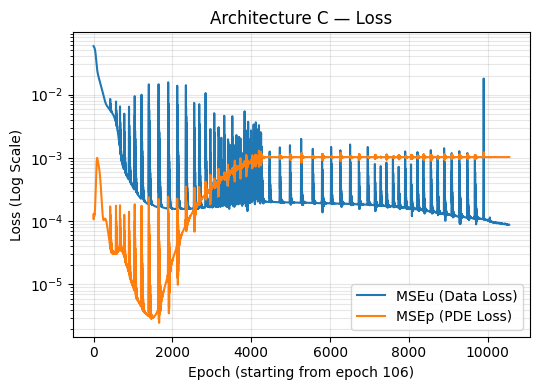

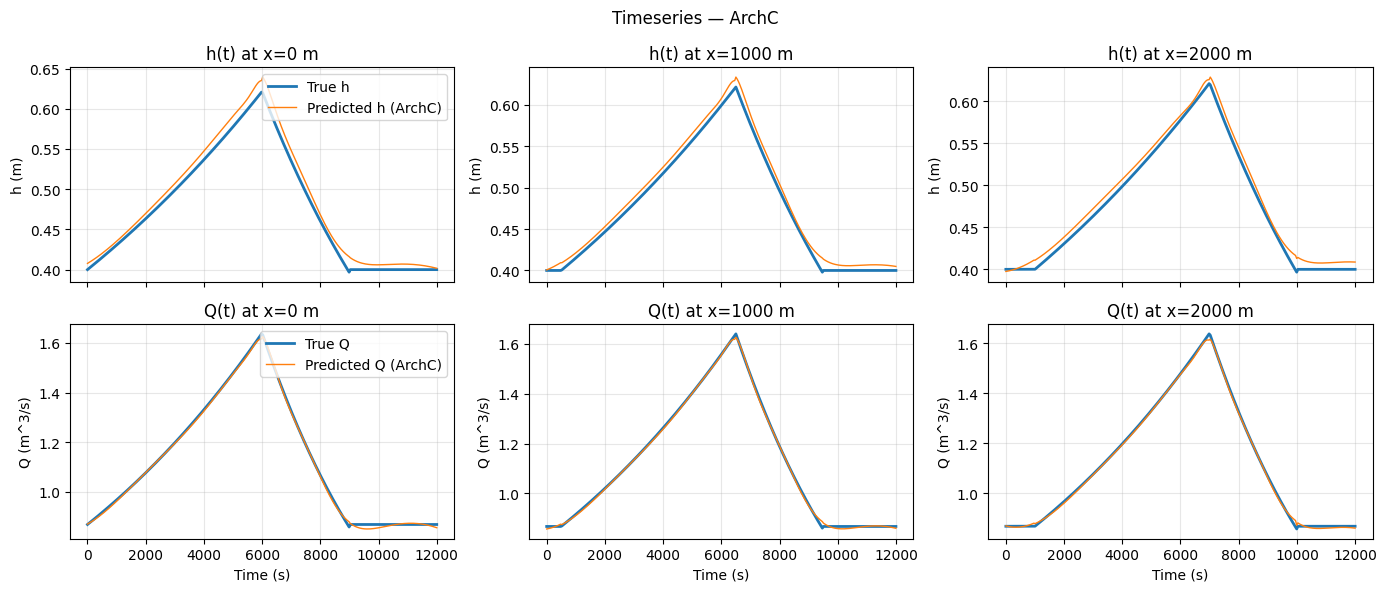

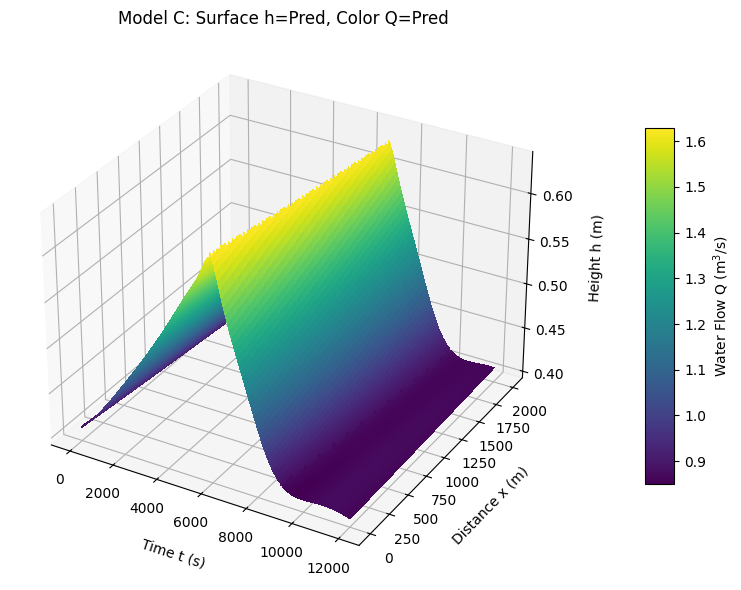

In [13]:
# PINN_SAINT_VENANT_THREE_ARCHS_FINAL_STABLE.py
# Implements architectures A (Stabilized), B, and C.

import math, numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # noqa: F401
from typing import Dict, Any

# --- 1. GLOBAL CONFIGURATION AND CONSTANTS ----------------------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE = torch.float32
np.random.seed(123); torch.manual_seed(123)
torch.set_default_dtype(DTYPE)

# Problem Constants
L = 2000.0; T = 12000.0
Bch = 2.0; g = 9.81
S0_true = 0.0025; n_true = 0.02
DT_NUM = 10.0 # seconds
DX_NUM = 100.0 # meters
EPS = 1e-6 # Epsilon for stability

# Parameter bounds
S0_LO, S0_HI = 1e-5, 2e-2
n_LO, n_HI = 0.005, 0.08

# --- 2. CORE PHYSICS AND GROUND TRUTH UTILITIES -----------------------

def bound_param(raw_param, lo, hi):
    return lo + (hi - lo) * torch.sigmoid(raw_param)

# Data Generation (Kinematic Wave Approximation)
def h_upstream(t):
    h00 = 0.4; ta, tb = 6000.0, 9000.0
    if t <= ta: return h00*(1.000735**(t/10.0))
    if t <= tb: return (h_upstream(ta))*(0.9985**((t-ta)/10.0))
    return 0.4

c_wave = 2.0
def h_field(x, t):
    tt = max(t - x/max(c_wave,1e-6), 0.0)
    return float(h_upstream(tt))

def Q_uniform(h, S0=S0_true, n=n_true):
    A = Bch * h
    P = Bch + 2.0 * h
    R = A / P
    return (1.0/max(n,EPS)) * A * (R**(2.0/3.0)) * math.sqrt(max(S0,EPS))

def dht_forward(x: float, t: float):
    if t + DT_NUM <= T:
        return (h_field(x, t + DT_NUM) - h_field(x, t)) / DT_NUM
    else:
        return (h_field(x, t) - h_field(x, max(t - DT_NUM, 0.0))) / DT_NUM

def dhx_forward(x: float, t: float):
    if x + DX_NUM <= L:
        return (h_field(x + DX_NUM, t) - h_field(x, t)) / DX_NUM
    else:
        return (h_field(x, t) - h_field(max(x - DX_NUM, 0.0), t)) / DX_NUM

# Pre-compute reference grid for visualization and data lookup
Nx, Nt = 201, 601
xs_grid = np.linspace(0, L, Nx).astype(np.float32)
ts_grid = np.linspace(0, T, Nt).astype(np.float32)
H_grid = np.zeros((Nt, Nx), dtype=np.float32)
for it,tv in enumerate(ts_grid):
    for ix,xv in enumerate(xs_grid):
        H_grid[it, ix] = h_field(float(xv), float(tv))

def sample_training(Nu=600, Nc=20000):
    def create_dataset(N):
        xs = np.random.uniform(0,L,N).astype(np.float32)
        ts = np.random.uniform(0,T,N).astype(np.float32)
        hs = np.array([h_field(x,t) for x,t in zip(xs,ts)], np.float32)
        qs = np.array([Q_uniform(h) for h in hs], np.float32)
        dht = np.array([dht_forward(x,t) for x,t in zip(xs,ts)], np.float32)
        dhx = np.array([dhx_forward(x,t) for x,t in zip(xs,ts)], np.float32)
        
        return {
            "x": torch.tensor(xs[:,None], dtype=DTYPE, device=DEVICE),
            "t": torch.tensor(ts[:,None], dtype=DTYPE, device=DEVICE),
            "h": torch.tensor(hs[:,None], dtype=DTYPE, device=DEVICE),
            "q": torch.tensor(qs[:,None], dtype=DTYPE, device=DEVICE),
            "dht": torch.tensor(dht[:,None], dtype=DTYPE, device=DEVICE),
            "dhx": torch.tensor(dhx[:,None], dtype=DTYPE, device=DEVICE),
        }
        
    U_full = create_dataset(Nu); C_full = create_dataset(Nc)
    C = {k: C_full[k] for k in ["x", "t", "h", "dht", "dhx"]} 
    U = {k: U_full[k] for k in ["x", "t", "h", "q", "dht", "dhx"]}
    return U, C

# --- 3. PHYSICS-INFORMED NEURAL NETWORK BASE CLASSES --------------------

class Physics:
    @staticmethod
    def A_of_h(h): return Bch * torch.clamp(h, min=EPS)
    @staticmethod
    def P_of_h(h): return torch.clamp(Bch + 2.0*h, min=EPS)
    @staticmethod
    def R_of_h(h): return Physics.A_of_h(h) / Physics.P_of_h(h)
    @staticmethod
    def Sf_manning(q, h, n):
        A = Physics.A_of_h(h); R = Physics.R_of_h(h)
        return (n**2) * q*torch.abs(q) / (torch.clamp(A**2 * (R**(4.0/3.0)), min=EPS))

    @staticmethod
    def pde_residuals_auto(x, t, h, q, n, S0):
        x.requires_grad_(True); t.requires_grad_(True)
        h = torch.clamp(h, min=EPS)
        A = Physics.A_of_h(h)
        # Gradient wrapper for convenience
        _grad = lambda output, input, retain=True, create=True: torch.autograd.grad(output, input, torch.ones_like(output), retain_graph=retain, create_graph=create)[0]

        # 1. Continuity Equation Residual (r1)
        h_t = _grad(h, t); Q_x = _grad(q, x)
        r1 = Bch*h_t + Q_x

        # 2. Momentum Equation Residual (r2)
        Q_t = _grad(q, t); term = q**2 / torch.clamp(A, min=EPS)
        dterm_dx = _grad(term, x); h_x = _grad(h, x)
        Sf = Physics.Sf_manning(q, h, n)
        r2 = Q_t + dterm_dx + g*A*(h_x + Sf - S0)
        
        return r1, r2

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=128, depth=5, act=nn.Tanh):
        super().__init__()
        layers = []; layers.append(nn.Linear(in_dim, hidden)); layers.append(act())
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden, hidden)); layers.append(act())
        layers.append(nn.Linear(hidden, out_dim))
        self.net = nn.Sequential(*layers)
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)
    def forward(self, x): return self.net(x.to(DTYPE))


class PINNBase(nn.Module):
    def __init__(self, S0_init, n_init):
        super().__init__()
        self.S0_raw = nn.Parameter(torch.tensor([S0_init], dtype=DTYPE, device=DEVICE))
        self.n_raw = nn.Parameter(torch.tensor([n_init], dtype=DTYPE, device=DEVICE))

    def S0(self): return bound_param(self.S0_raw, S0_LO, S0_HI)
    def n (self): return bound_param(self.n_raw , n_LO , n_HI )

# --- 4. ARCHITECTURE IMPLEMENTATIONS ----------------------------------

class ArchA(PINNBase):
    """
    Architecture A: Outputs Q. Inputs: [x, t, h_true, dh/dt_num, dh/dx_num]
    FIXED: Implements MAP Regularization and Loss Weighting to solve noise problem.
    """
    def __init__(self, S0_init=0.0025, n_init=0.020, 
                 w_u_q=10.0, w_pde1=1.0, w_pde2=0.5, 
                 mu_S0=0.0025, mu_n=0.020, sig_S0=5e-4, sig_n=3e-3, prior_w=1.0):
        
        super().__init__(S0_init, n_init)
        self.net = MLP(5, 1, hidden=128, depth=5, act=nn.Tanh)
        
        self.w_u_q, self.w_pde1, self.w_pde2 = w_u_q, w_pde1, w_pde2
        self.prior_w = prior_w
        
        # MAP Prior Parameters
        self.register_buffer("mu_S0", torch.tensor(mu_S0))
        self.register_buffer("mu_n", torch.tensor(mu_n))
        self.register_buffer("sig_S0", torch.tensor(sig_S0))
        self.register_buffer("sig_n", torch.tensor(sig_n))

    def forward(self, x, t, h, dht, dhx):
        z = torch.cat([(x/L), (t/T), h, dht*(T/1e3), dhx*(L/1e3)], dim=1)
        return self.net(z)

    def loss(self, U, C):
        # 1. OBSERVATION LOSS (MSEu: enforce Q_pred = Q_true)
        q_pred_u = self.forward(U["x"], U["t"], U["h"], U["dht"], U["dhx"])
        mse_u_q = torch.mean((q_pred_u - U["q"])**2)

        # 2. PDE COLLOCATION LOSS (MSEp)
        _grad = lambda output, input: torch.autograd.grad(output, input, torch.ones_like(output), retain_graph=True, create_graph=True)[0]

        x = C["x"].clone().detach().requires_grad_(True)
        t = C["t"].clone().detach().requires_grad_(True)
        h = torch.clamp(C["h"].detach(), min=EPS)
        dht_num, dhx_num = C["dht"], C["dhx"] # Noisy inputs used here
        
        q_c = self.forward(x, t, h, dht_num, dhx_num)
        A = Physics.A_of_h(h)
        
        # Continuity Residual (r1)
        Q_x = _grad(q_c, x)
        r1 = Bch*dht_num + Q_x # Uses noisy dht_num
        
        # Momentum Residual (r2)
        Q_t = _grad(q_c, t)
        term = q_c**2 / torch.clamp(A, min=EPS)
        dterm_dx = _grad(term, x)
        Sf = Physics.Sf_manning(q_c, h, self.n())
        r2 = Q_t + dterm_dx + g*A*(dhx_num + Sf - self.S0()) # Uses noisy dhx_num
        
        mse_p1 = torch.mean(r1**2)
        mse_p2 = torch.mean(r2**2)
        
        # 3. MAP PRIOR REGULARIZATION (Stabilizer)
        lam = torch.stack([self.S0(), self.n()]).squeeze()
        mu = torch.stack([self.mu_S0, self.mu_n]).squeeze()
        sig = torch.stack([self.sig_S0, self.sig_n]).squeeze()
        prior = torch.sum(((lam - mu)/sig)**2)
        
        # Total Loss (Weighted components + Prior)
        weighted_pde_loss = self.w_pde1 * mse_p1 + self.w_pde2 * mse_p2
        total_loss = (self.w_u_q * mse_u_q) + weighted_pde_loss + (self.prior_w * prior)
        
        info = {"mse_u": mse_u_q.item(), "mse_p": weighted_pde_loss.item(),
                "prior": (self.prior_w * prior).item(),
                "S0": self.S0().item(), "n": self.n().item()}
        return total_loss, info


class ArchB(PINNBase):
    """
    Architecture B: Outputs h and Q. Inputs: [x, t]
    Uses Autograd for ALL PDE terms.
    """
    def __init__(self, S0_init=0.0006, n_init=0.05):
        super().__init__(S0_init, n_init)
        self.net = MLP(2, 2, hidden=128, depth=5)
        self.Q_scale = torch.tensor([2.5], dtype=DTYPE, device=DEVICE)

    def forward(self, x, t):
        z = torch.cat([(x/L), (t/T)], dim=1)
        out = self.net(z)
        raw_h, raw_q = out[:, :1], out[:, 1:2]
        h_hat = F.softplus(raw_h) + 1e-3
        q_hat = self.Q_scale * torch.tanh(raw_q)
        return h_hat, q_hat

    def loss(self, U, C):
        h_hat_u, q_hat_u = self.forward(U["x"], U["t"])
        mse_u = torch.mean((h_hat_u - U["h"])**2) + torch.mean((q_hat_u - U["q"])**2)

        x = C["x"].clone().detach().requires_grad_(True)
        t = C["t"].clone().detach().requires_grad_(True)
        h_c, q_c = self.forward(x, t)

        r1, r2 = Physics.pde_residuals_auto(x, t, h_c, q_c, self.n(), self.S0())
        mse_p = torch.mean(r1**2) + torch.mean(r2**2)
        
        total_loss = mse_u + mse_p
        info = {"mse_u": mse_u.item(), "mse_p": mse_p.item(),
                "S0": self.S0().item(), "n": self.n().item()}
        return total_loss, info

class ArchC(PINNBase):
    """
    Architecture C: Outputs h and Q. Inputs: [x, t, dh/dt_num]
    MAP prior penalty and dh/dt penalty terms.
    """
    def __init__(self, mu_S0=0.0020, mu_n=0.030, sig_S0=4.5e-4, sig_n=5.0e-3,
                 prior_w=1.0, dpen_w=1.0):
        super().__init__(mu_S0, mu_n)
        self.net = MLP(3, 2, hidden=128, depth=5)
        self.Q_scale = torch.tensor([2.5], dtype=DTYPE, device=DEVICE)
        
        self.register_buffer("mu_S0", torch.tensor(mu_S0))
        self.register_buffer("mu_n", torch.tensor(mu_n))
        self.register_buffer("sig_S0", torch.tensor(sig_S0))
        self.register_buffer("sig_n", torch.tensor(sig_n))
        
        self.prior_w = prior_w 
        self.dpen_w = dpen_w 

    def forward(self, x, t, dht):
        z = torch.cat([(x/L), (t/T), dht*(T/1e3)], dim=1)
        out = self.net(z)
        raw_h, raw_q = out[:, :1], out[:, 1:2]
        h_hat = F.softplus(raw_h) + 1e-3
        q_hat = self.Q_scale * torch.tanh(raw_q)
        return h_hat, q_hat

    def loss(self, U, C):
        h_hat_u, q_hat_u = self.forward(U["x"], U["t"], U["dht"])
        mse_u = torch.mean((h_hat_u - U["h"])**2) + torch.mean((q_hat_u - U["q"])**2)

        x = C["x"].clone().detach().requires_grad_(True)
        t = C["t"].clone().detach().requires_grad_(True)
        h_c, q_c = self.forward(x, t, C["dht"])
        
        r1, r2 = Physics.pde_residuals_auto(x, t, h_c, q_c, self.n(), self.S0())
        mse_p = torch.mean(r1**2) + torch.mean(r2**2)
        
        lam = torch.stack([self.S0(), self.n()]).squeeze()
        mu = torch.stack([self.mu_S0, self.mu_n]).squeeze()
        sig = torch.stack([self.sig_S0, self.sig_n]).squeeze()
        prior = torch.sum(((lam - mu)/sig)**2)
        
        _grad = lambda output, input: torch.autograd.grad(output, input, torch.ones_like(output), retain_graph=True, create_graph=True)[0]
        dhdt_hat = _grad(h_c, t)
        dpen = torch.mean((dhdt_hat - C["dht"])**2)
        
        total_loss = mse_u + mse_p + self.prior_w*prior + self.dpen_w*dpen
        info = {"mse_u": mse_u.item(), "mse_p": mse_p.item(),
                "prior": (self.prior_w*prior).item(), "dpen": (self.dpen_w*dpen).item(),
                "S0": self.S0().item(), "n": self.n().item()}
        return total_loss, info

# --- 5. TRAINING AND PLOTTING UTILITIES -----------------------------------------

def train(model, U, C, epochs_adam=10000, lr=5e-4, epochs_lbfgs=10000, name="model"):
    model.to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    hist = {"mse_u": [], "mse_p": [], "S0": [], "n": []}

    def compute_loss():
        with torch.enable_grad():
            loss, info = model.loss(U, C)
        return loss, info

    # 1. ADAM OPTIMIZATION
    for ep in range(epochs_adam):
        opt.zero_grad(set_to_none=True)
        loss, info = compute_loss()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        opt.step()
        
        hist["mse_u"].append(info["mse_u"]); hist["mse_p"].append(info["mse_p"])
        hist["S0"].append(info["S0"]); hist["n"].append(info["n"])

        if (ep + 1) % 200 == 0 or ep == 0:
            extras = " ".join([f"{k}={v:.3e}" for k, v in info.items() if isinstance(v, float)])
            print(f"[{name}] Adam {ep+1:4d} loss={loss.item():.3e} {extras}")

    # 2. L-BFGS OPTIMIZATION
    opt_lbfgs = torch.optim.LBFGS(model.parameters(), max_iter=epochs_lbfgs,
                                  tolerance_grad=1e-7, tolerance_change=1e-9,
                                  history_size=50, line_search_fn="strong_wolfe")
    
    def closure():
        opt_lbfgs.zero_grad()
        loss, info = compute_loss()
        loss.backward()
        hist["mse_u"].append(info["mse_u"]); hist["mse_p"].append(info["mse_p"])
        hist["S0"].append(info["S0"]); hist["n"].append(info["n"])
        return loss

    opt_lbfgs.step(closure)
    
    # Final log after L-BFGS
    l, info = compute_loss()
    extras = " ".join([f"{k}={v:.3e}" for k, v in info.items() if isinstance(v, float)])
    print(f"[{name}] LBFGS done loss={l.item():.3e} {extras}")
    if "S0" in info: print(f"[{name}] Estimated: S0={info['S0']:.6f} n={info['n']:.5f}")
    
    return model, hist

def plot_losses(hist, title="Loss History"):
    plt.figure(figsize=(5.5, 4))
    start_idx = max(100, int(len(hist["mse_u"]) * 0.01))
    
    plt.semilogy(hist["mse_u"][start_idx:], label="MSEu (Data Loss)")
    plt.semilogy(hist["mse_p"][start_idx:], label="MSEp (PDE Loss)")
    
    if "prior" in hist and "dpen" in hist:
        plt.semilogy(np.array(hist["prior"])[start_idx:], label="Prior Loss (C)")
        plt.semilogy(np.array(hist["dpen"])[start_idx:], label="dht Penalty (C)")

    plt.xlabel(f"Epoch (starting from epoch {start_idx})")
    plt.ylabel("Loss (Log Scale)")
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_timeseries(model, label):
    stations = [0.0, 1000.0, 2000.0]
    tt = np.linspace(0, T, 300).astype(np.float32)
    fig, axs = plt.subplots(2, 3, figsize=(14, 6), sharex='col')

    with torch.no_grad():
        for j, x0 in enumerate(stations):
            h_true = np.array([h_field(x0, float(t)) for t in tt], np.float32)
            q_true = np.array([Q_uniform(float(v)) for v in h_true], np.float32)
            dht_true = np.array([dht_forward(x0, float(t)) for t in tt], np.float32)
            dhx_true = np.array([dhx_forward(x0, float(t)) for t in tt], np.float32)
            
            xt = torch.tensor(tt[:,None], dtype=DTYPE, device=DEVICE)
            xx = torch.tensor((0*tt + x0)[:,None], dtype=DTYPE, device=DEVICE)
            dht = torch.tensor(dht_true[:,None], dtype=DTYPE, device=DEVICE)
            dhx = torch.tensor(dhx_true[:,None], dtype=DTYPE, device=DEVICE)
            
            if isinstance(model, ArchA):
                hh = torch.tensor(h_true[:,None], dtype=DTYPE, device=DEVICE)
                q_pred = model(xx, xt, hh, dht, dhx).cpu().numpy().ravel()
                h_pred = h_true
            elif isinstance(model, ArchB):
                h_pred, q_pred = model(xx, xt)
                h_pred = h_pred.cpu().numpy().ravel()
                q_pred = q_pred.cpu().numpy().ravel()
            elif isinstance(model, ArchC):
                h_pred, q_pred = model(xx, xt, dht)
                h_pred = h_pred.cpu().numpy().ravel()
                q_pred = q_pred.cpu().numpy().ravel()

            axs[0, j].plot(tt, h_true, lw=2, label="True h")
            axs[0, j].plot(tt, h_pred, lw=1, label=f"Predicted h ({label})")
            axs[0, j].set_title(f"h(t) at x={int(x0)} m"); axs[0, j].set_ylabel("h (m)")
            
            axs[1, j].plot(tt, q_true, lw=2, label="True Q")
            axs[1, j].plot(tt, q_pred, lw=1, label=f"Predicted Q ({label})")
            axs[1, j].set_title(f"Q(t) at x={int(x0)} m"); axs[1, j].set_ylabel("Q (m^3/s)")
            axs[1, j].set_xlabel("Time (s)")
            
            for ax in (axs[0, j], axs[1, j]): ax.grid(True, alpha=0.3)

    axs[0, 0].legend(); axs[1, 0].legend()
    fig.suptitle(f"Timeseries — {label}"); plt.tight_layout(); plt.show()


def plot_surface_with_color(Tgrid, Xgrid, Hgrid, Cgrid, title):
    fig = plt.figure(figsize=(9, 6)); ax = fig.add_subplot(111, projection='3d')
    Cn = (Cgrid - Cgrid.min()) / (Cgrid.max() - Cgrid.min() + 1e-12)
    facecolors = plt.cm.viridis(Cn)
    
    ax.plot_surface(Tgrid, Xgrid, Hgrid, facecolors=facecolors,
                     rstride=4, cstride=4, linewidth=0, antialiased=False, shade=False)
    
    m = plt.cm.ScalarMappable(cmap='viridis'); m.set_array(Cgrid)
    cbar = fig.colorbar(m, ax=ax, shrink=0.65, aspect=12, pad=0.1)
    cbar.set_label("Water Flow Q (m$^3$/s)")
    ax.set_xlabel("Time t (s)", labelpad=10)
    ax.set_ylabel("Distance x (m)", labelpad=10)
    ax.set_zlabel("Height h (m)", labelpad=10)
    ax.set_title(title); plt.tight_layout(); plt.show()

def plot_wave_truth_3D():
    Tgrid, Xgrid = np.meshgrid(ts_grid, xs_grid, indexing='ij')
    Q_grid = np.zeros_like(H_grid, dtype=np.float32)
    for it, row in enumerate(H_grid):
        for ix, h_val in enumerate(row):
            Q_grid[it, ix] = Q_uniform(h_val)

    plot_surface_with_color(Tgrid, Xgrid, H_grid, Q_grid,
                             title="Ground Truth: h(x,t) colored by Q(x,t)")

@torch.no_grad()
def plot_wave_model_3D(model, title_prefix="Model"):
    Tgrid, Xgrid = np.meshgrid(ts_grid, xs_grid, indexing='ij')
    xt = torch.tensor(Tgrid.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
    xx = torch.tensor(Xgrid.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
    
    if isinstance(model, ArchA):
        dhtg = np.array([dht_forward(float(x), float(t))
                          for t, x in zip(Tgrid.ravel(), Xgrid.ravel())], np.float32)
        dhxg = np.array([dhx_forward(float(x), float(t))
                          for t, x in zip(Tgrid.ravel(), Xgrid.ravel())], np.float32)
        hh = torch.tensor(H_grid.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
        dht = torch.tensor(dhtg.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
        dhx = torch.tensor(dhxg.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
        
        q_pred = model(xx, xt, hh, dht, dhx).cpu().numpy().reshape(Nt, Nx)
        Hsurf, Csurf = H_grid, q_pred
        ttl = f"{title_prefix} A: Surface h=True, Color Q=Pred"
        
    elif isinstance(model, ArchB):
        h_pred, q_pred = model(xx, xt)
        Hsurf = h_pred.cpu().numpy().reshape(Nt, Nx)
        Csurf = q_pred.cpu().numpy().reshape(Nt, Nx)
        ttl = f"{title_prefix} B: Surface h=Pred, Color Q=Pred"
        
    else: # ArchC
        dhtg = np.array([dht_forward(float(x), float(t))
                          for t, x in zip(Tgrid.ravel(), Xgrid.ravel())], np.float32)
        dht = torch.tensor(dhtg.reshape(-1, 1), dtype=DTYPE, device=DEVICE)
        
        h_pred, q_pred = model(xx, xt, dht)
        Hsurf = h_pred.cpu().numpy().reshape(Nt, Nx)
        Csurf = q_pred.cpu().numpy().ravel().reshape(Nt, Nx)
        ttl = f"{title_prefix} C: Surface h=Pred, Color Q=Pred"
        
    plot_surface_with_color(Tgrid, Xgrid, Hsurf, Csurf, title=ttl)

# --- 6. MAIN EXECUTION ------------------------------------------------

if __name__ == "__main__":
    U, C = sample_training(Nu=600, Nc=20000)

    plot_wave_truth_3D()

    # --- Train Architecture A (Stabilized) ---
    print("\n=== Train A (Stabilized: MAP + Tuned Weights) ===")
    A = ArchA(S0_init=S0_true, n_init=n_true, # Start near true values
              w_u_q=10.0, w_pde1=1.0, w_pde2=0.5, # Tuned Weights
              mu_S0=S0_true, mu_n=n_true, sig_S0=5e-4, sig_n=3e-3, prior_w=1.0) # MAP Prior
    A, histA = train(A, U, C, epochs_adam=5000, lr=5e-4, epochs_lbfgs=5000, name="ArchA_FIXED")
    plot_losses(histA, "Architecture A — Loss (Stabilized)")
    plot_timeseries(A, "ArchA"); plot_wave_model_3D(A, title_prefix="Model")

    # --- Train Architecture B (Original) ---
    print("\n=== Train B (learn S0,n; bounded) ===")
    B = ArchB(S0_init=0.0006, n_init=0.05)
    B, histB = train(B, U, C, epochs_adam=10000, lr=5e-4, epochs_lbfgs=10000, name="ArchB")
    print(f"[ArchB] Estimated: S0={B.S0().item():.6f} n={B.n().item():.5f}")
    plot_losses(histB, "Architecture B — Loss")
    plot_timeseries(B, "ArchB"); plot_wave_model_3D(B, title_prefix="Model")

    # --- Train Architecture C (Original) ---
    print("\n=== Train C (learn S0,n; MAP + dht penalty) ===")
    Cc = ArchC(mu_S0=0.0020, mu_n=0.030, sig_S0=4.5e-4, sig_n=5.0e-3, prior_w=1.0, dpen_w=1.0)
    Cc, histC = train(Cc, U, C, epochs_adam=10000, lr=5e-4, epochs_lbfgs=10000, name="ArchC")
    print(f"[ArchC] Estimated: S0={Cc.S0().item():.6f} n={Cc.n().item():.5f}")
    plot_losses(histC, "Architecture C — Loss")
    plot_timeseries(Cc, "ArchC"); plot_wave_model_3D(Cc, title_prefix="Model")